In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# a. Data exploration
print(df.describe())
print(df.info())
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Survived'].value_counts())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

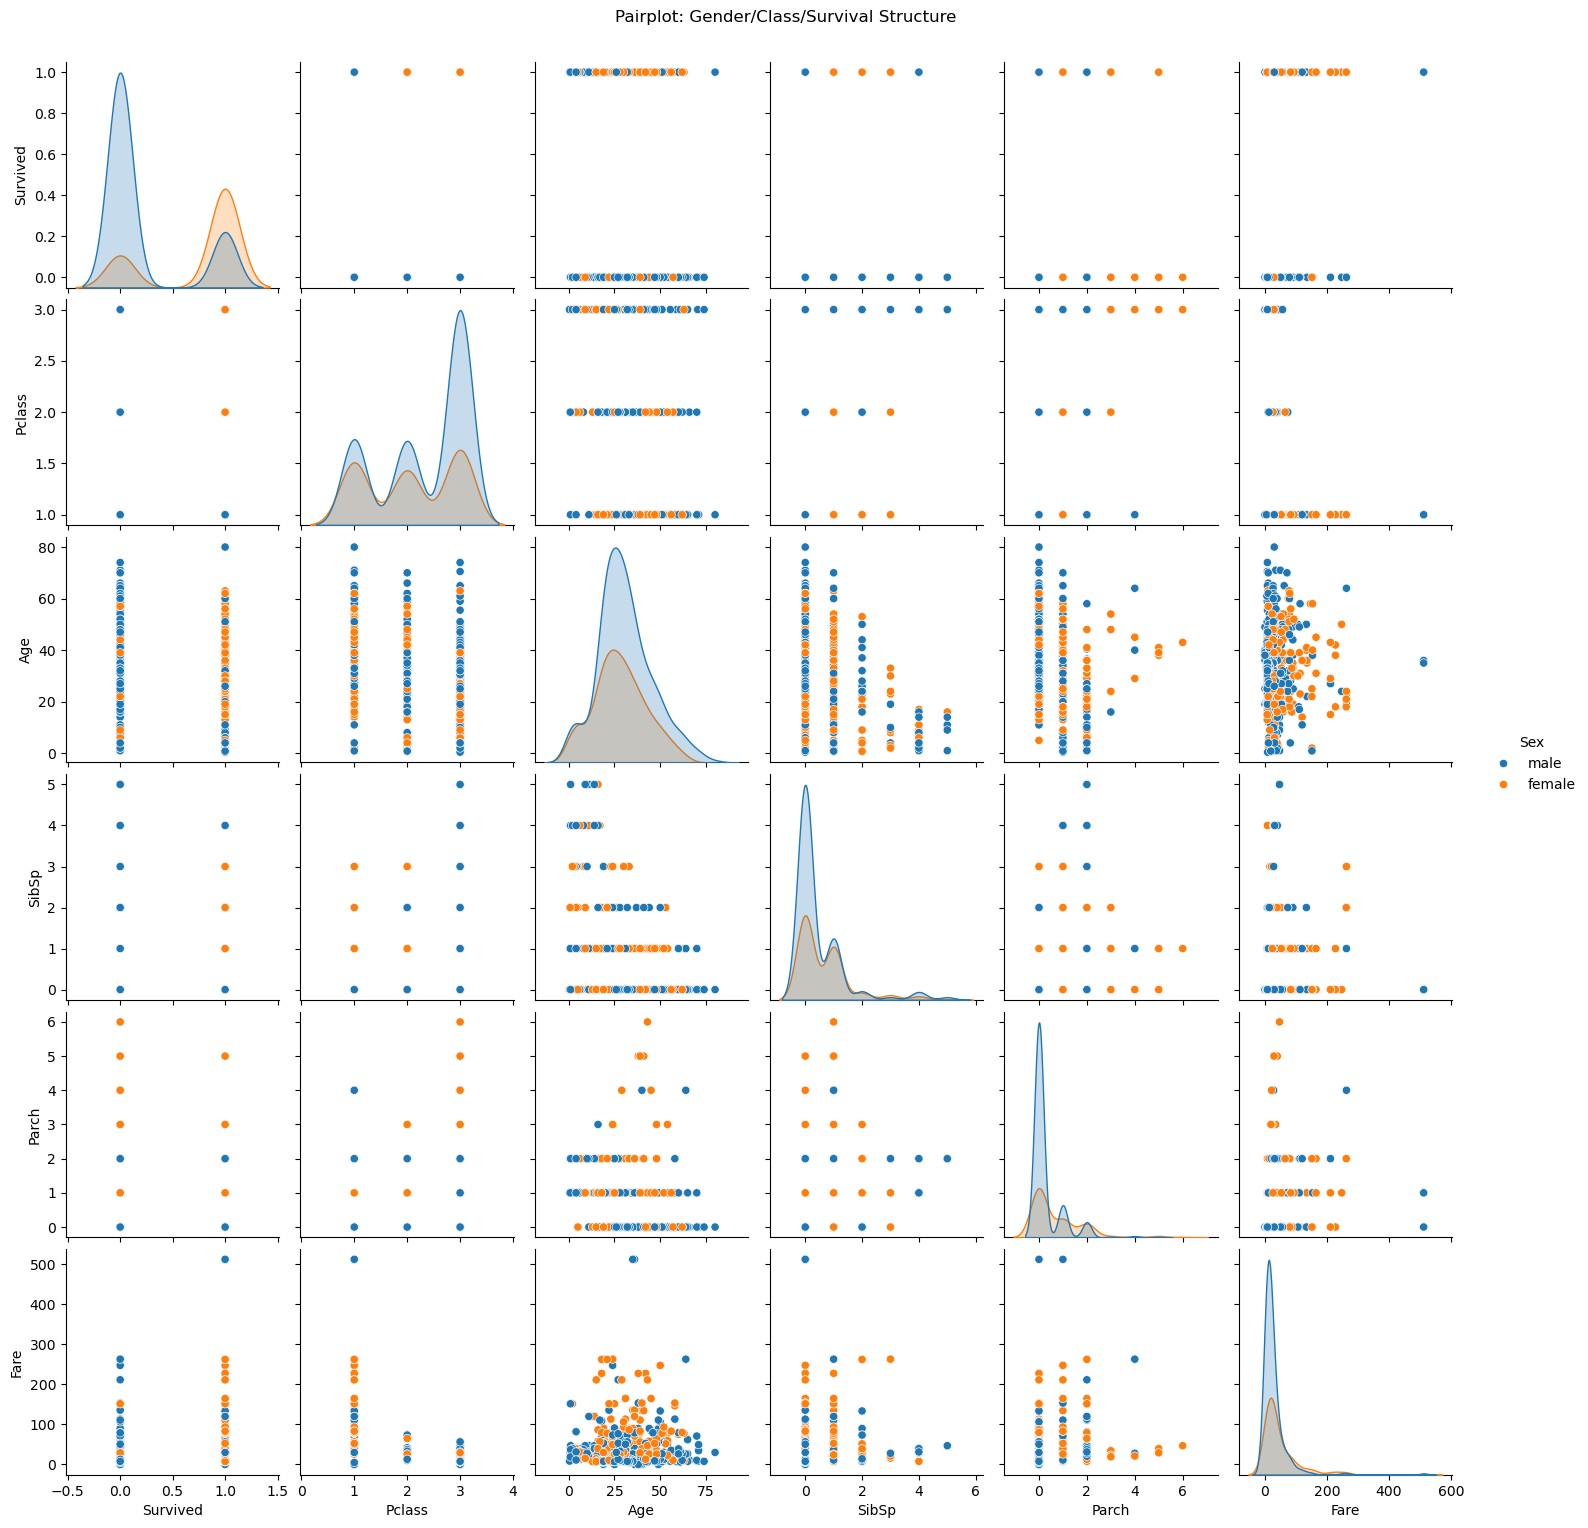

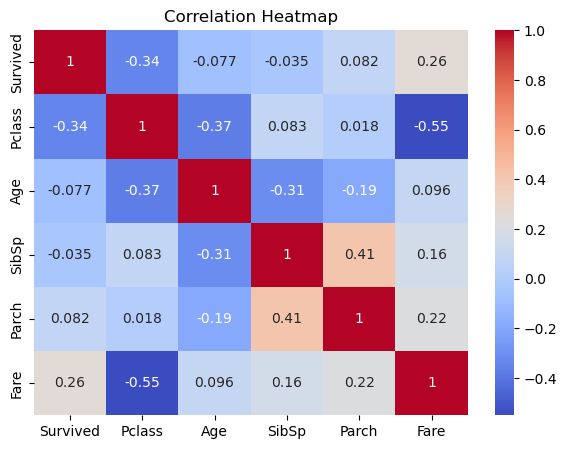

In [4]:
# b. Use sns.pairplot(), sns.heatmap() for visualization
sns.pairplot(df[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex']].dropna(),
             hue='Sex',
             vars=['Survived','Pclass','Age','SibSp','Parch','Fare'])
plt.suptitle('Pairplot: Gender/Class/Survival Structure', y=1.02)
plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

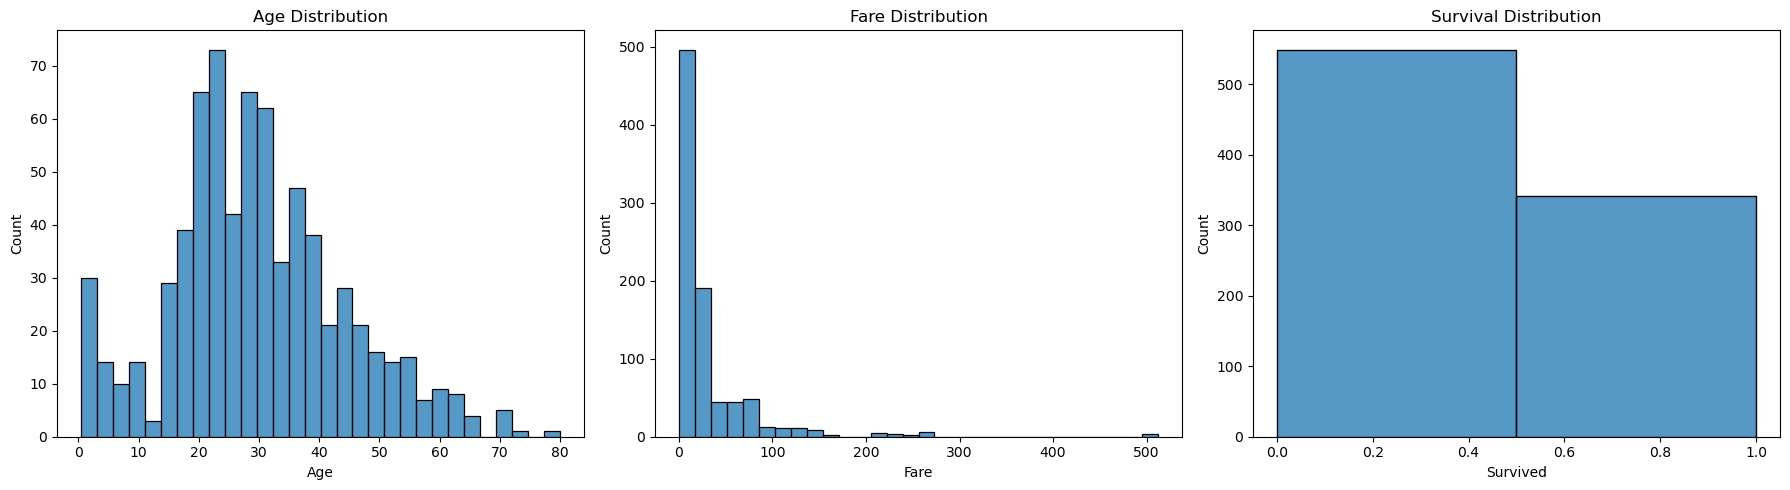

In [6]:
# d. Histograms, Boxplots, Scatterplots
# Histograms
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Fare'], bins=30)
plt.title('Fare Distribution')

plt.subplot(1,3,3)
sns.histplot(df['Survived'], bins=2)
plt.title('Survival Distribution')
plt.tight_layout()
plt.show()

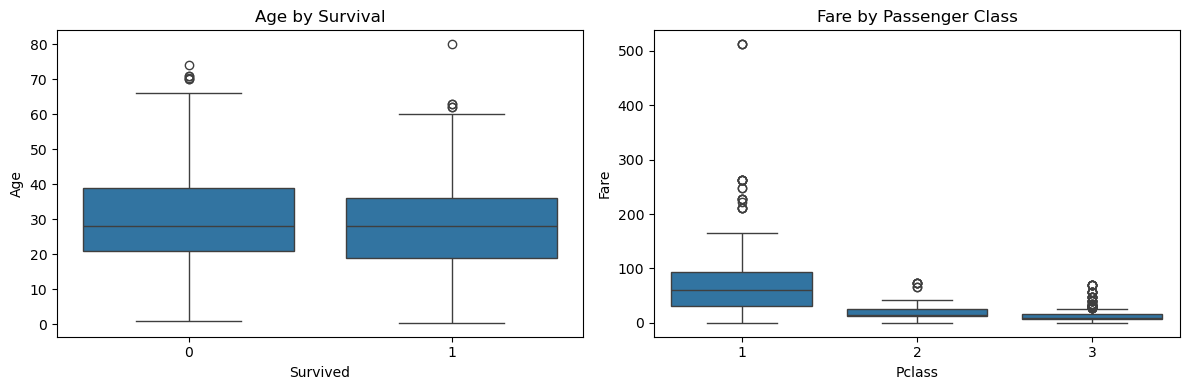

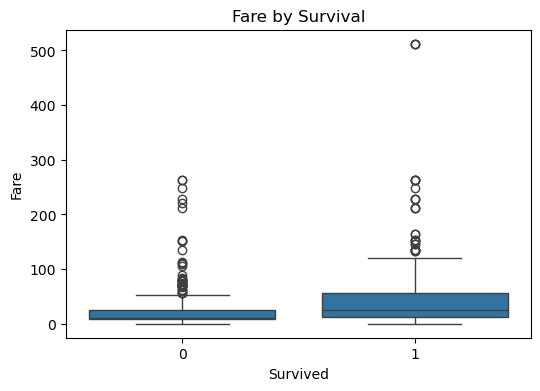

In [7]:
# Boxplots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age by Survival')

plt.subplot(1,2,2)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.show()

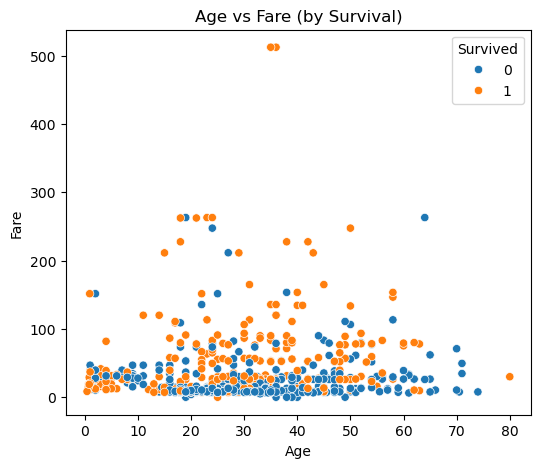

In [10]:
# Scatterplot
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare (by Survival)')
plt.show()

# summary
Survival on the Titanic was mainly influenced by gender, passenger class, and fare — women, first-class passengers, and those who paid higher fares had much higher survival chances. Age had a small effect, with children slightly favored. Most passengers traveled alone, and differences by embarkation port were minor. Age had some missing values and Cabin was missing for most passengers.